In [1]:
#Importing necessary libraries for this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# **Importing DateTime data**

You'll work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

The column names and data types are as follows:
```
divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
```
It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time.

`pandas` has been imported as `pd` and the `divorce_file` is a variable assigned to the link of the divorce dataset file.

**Instructions:**
* Load or read `divorce_file` dataset file, saving as a DataFrame, `divorce`; indicate in the import function that the `divorce_date`, `dob_man`, `dob_woman`, and `marriage_date` columns should be imported as DateTime values.



In [3]:
#Path or link to the dataset file
divorce_file = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/divorce.csv?raw=True'

# Load DataFrame divorce from divorce_file, parsing the appropriate columns as dates in the reading
divorce = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/divorce.csv?raw=True', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


In [4]:
#Run this codecell before proceeding to the next exercise
divorce = pd.read_csv(divorce_file, parse_dates=['divorce_date', 'dob_man', 'dob_woman'])

# **Updating data type to DateTime**

Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

pandas has been imported as pd.

1. Which of the columns in the divorce DataFrame has not been updated to a DateTime data type but should be? Print either A, B, C or D based on the exploration of the data types of each column in the codecell below.
* A. divorce_date
* B. marriage_date
* C. education_woman
* D. num_kids
2. Convert the column of the divorce DataFrame you found out in question #1 that should have been a DateTime data type to DateTime values.

In [6]:
#1. Explore the dataset of each column in divorce DataFrame
print('B')

#1. Print either A, B, C or D as an choice of the answer to the above question

#2. Convert the column to DateTime values
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])


B


In [7]:
#Run this codecell before proceeding to the next question
divorce = pd.read_csv(divorce_file, parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])

# **Visualizing relationships over time**

Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

The `divorce` DataFrame (with all dates formatted as DateTime data types) has been loaded for you. `pandas` has been loaded as `pd`, `matplotlib.pyplot` has been loaded as `plt`, and `seaborn` has been loaded as `sns`.

**Instructions:**
1. Define a column called `marriage_year`, which contains just the year portion of the `marriage_date` column.
2. Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.


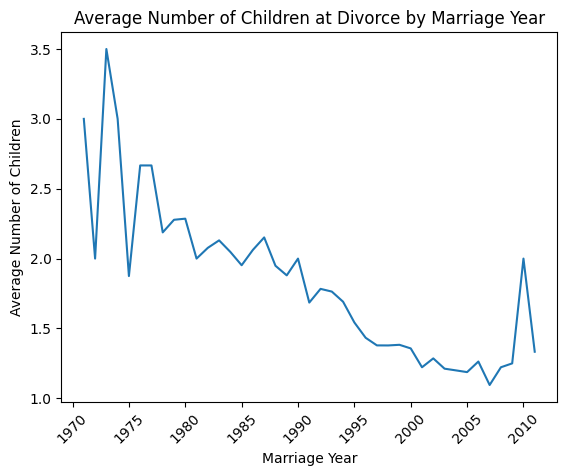

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from 'marriage_date' and create a new column 'marriage_year'
divorce['marriage_year'] = divorce['marriage_date'].dt.year

# Group by 'marriage_year' and calculate the average number of children
avg_kids_by_year = divorce.groupby('marriage_year')['num_kids'].mean().reset_index()

# Create the line plot to visualize the relationship

sns.lineplot(data=avg_kids_by_year, x='marriage_year', y='num_kids')
plt.title('Average Number of Children at Divorce by Marriage Year')
plt.xlabel('Marriage Year')
plt.ylabel('Average Number of Children')
plt.xticks(rotation=45)
plt.show()


# **Interpreting a heatmap**

Which of the below statements is correct regarding the relationships between variables in the `divorce` DataFrame?

The `divorce` DataFrame has been loaded for you so that you can explore it in the codecell given below to answer the question. `pandas` has been loaded as `pd`, `matplotlib.pyplot` has been loaded as `plt`, and `seaborn` has been loaded as `sns`.

* A. `marriage_duration` is strongly positively correlated with `marriage_month`.
* B. The correlation between `num_kids` and `income_man` is stronger than the correlation between `num_kids` and `marriage_duration`.
* C. A later `marriage_year` causes a lower number of children, represented by `num_kids`.
D. A later `marriage_year` is correlated with having fewer children.

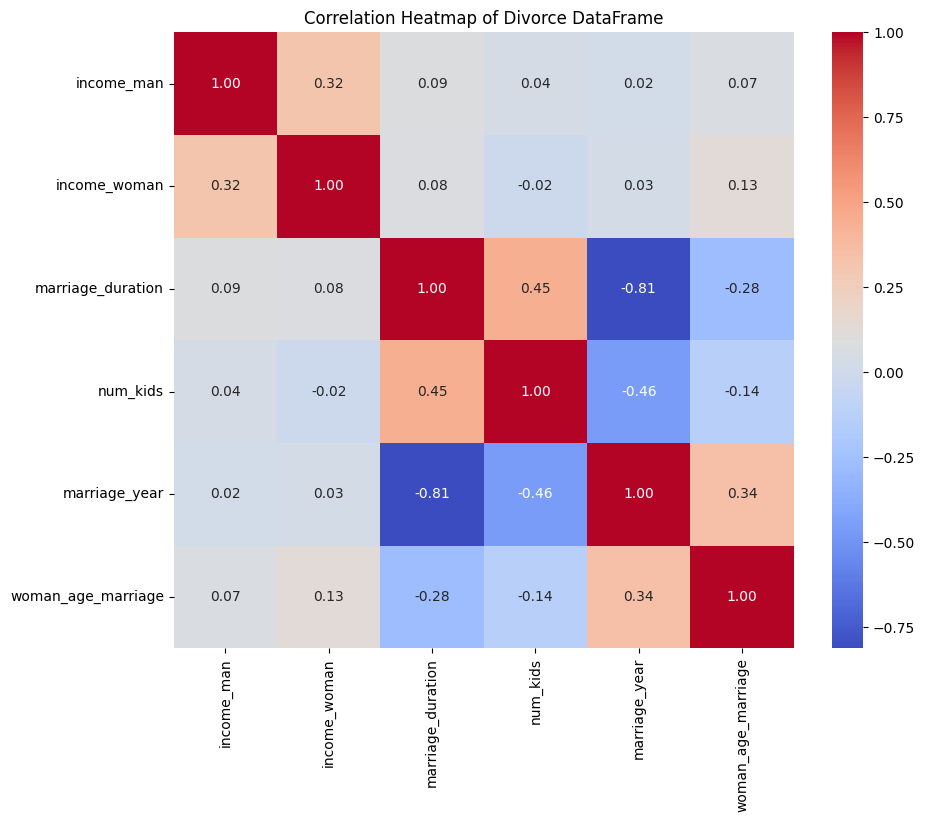

                    income_man  income_woman  marriage_duration  num_kids  \
income_man            1.000000      0.318047           0.085321  0.040848   
income_woman          0.318047      1.000000           0.078677 -0.018015   
marriage_duration     0.085321      0.078677           1.000000  0.447358   
num_kids              0.040848     -0.018015           0.447358  1.000000   
marriage_year         0.019170      0.026433          -0.812469 -0.461495   
woman_age_marriage    0.066237      0.125453          -0.279976 -0.138574   

                    marriage_year  woman_age_marriage  
income_man               0.019170            0.066237  
income_woman             0.026433            0.125453  
marriage_duration       -0.812469           -0.279976  
num_kids                -0.461495           -0.138574  
marriage_year            1.000000            0.344769  
woman_age_marriage       0.344769            1.000000  


In [22]:
# Create a correlation visualization to answer the above question here
numeric_cols = divorce.select_dtypes(include='number')

# Calculate the correlation matrix using only numeric columns
corr_matrix = numeric_cols.corr()


# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Show the plot
plt.title('Correlation Heatmap of Divorce DataFrame')
plt.show()
print(corr_matrix)

# Print either A, B, C or D as choice of your answer to the question given above


# **Visualizing variable relationships**

In the last exercise, you may have noticed that a longer `marriage_duration` is correlated with having more children, represented by the `num_kids` column. The correlation coefficient between the `marriage_duration` and `num_kids` variables is `0.45`.

In this exercise, you'll create a scatter plot to visualize the relationship between these variables. `pandas` has been loaded as `pd`, `matplotlib.pyplot` has been loaded as `plt`, and `seaborn` has been loaded as `sns`. The dataset `divorce` is also loaded previously.

**Instructions:**
* Create a scatterplot showing `marriage_duration` on the x-axis and `num_kids` on the y-axis.


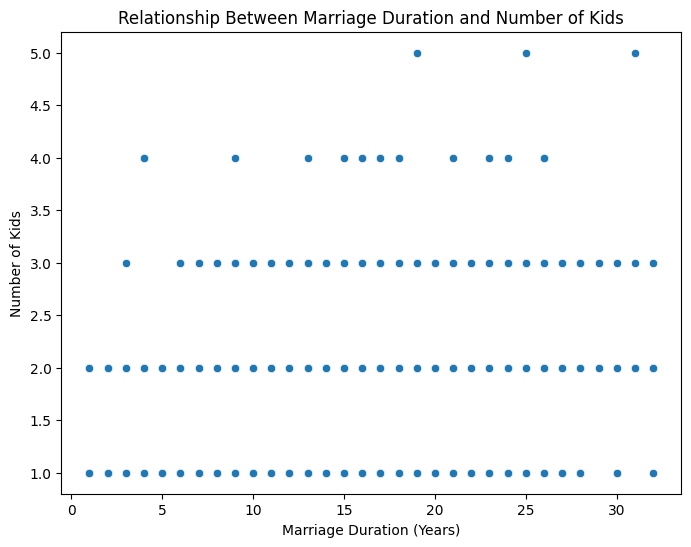

In [18]:
# Create the scatterplot


plt.figure(figsize=(8, 6))
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')

# Adding labels and title for clarity
plt.xlabel('Marriage Duration (Years)')
plt.ylabel('Number of Kids')
plt.title('Relationship Between Marriage Duration and Number of Kids')

# Show the plot
plt.show()




# **Visualizing multiple variable relationships**

Seaborn's `.pairplot()` is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

Your task is to use a pairplot to compare the relationship between `marriage_duration` and `income_woman`. `pandas` has been loaded as `pd`, `matplotlib.pyplot` has been loaded as `plt`, and `seaborn` has been loaded as `sns`.

**Instructions:**
* Create a pairplot to visualize the relationships between `income_woman` and `marriage_duration` in the `divorce` DataFrame.


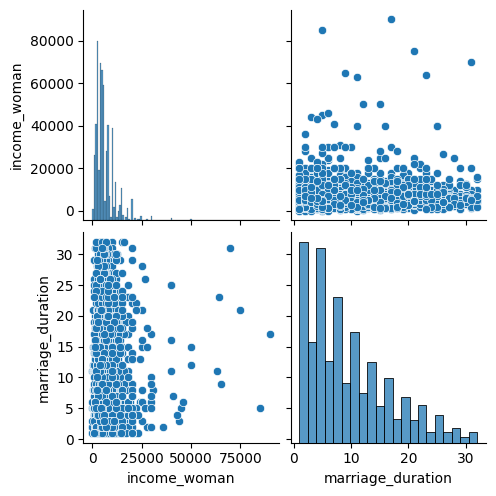

In [14]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=["income_woman" , "marriage_duration"])
plt.show()


# **Categorical data in scatter plots**

In the class, we explored how men's education and age at marriage related to other variables in the  `divorce` DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

The `divorce` DataFrame has been loaded previously, and `woman_age_marriage` has already been defined as a column representing an estimate of the woman's age at the time of marriage using the first lines of code in the codecell given below. `pandas` has been loaded as `pd`, `matplotlib.pyplot` has been loaded as `plt`, and `seaborn` has been loaded as `sns`.

**Instructions:**
* Create a scatter plot that shows `woman_age_marriage` on the x-axis and `income_woman` on the y-axis; each data point should be colored based on the woman's level of education, represented by `education_woman`.


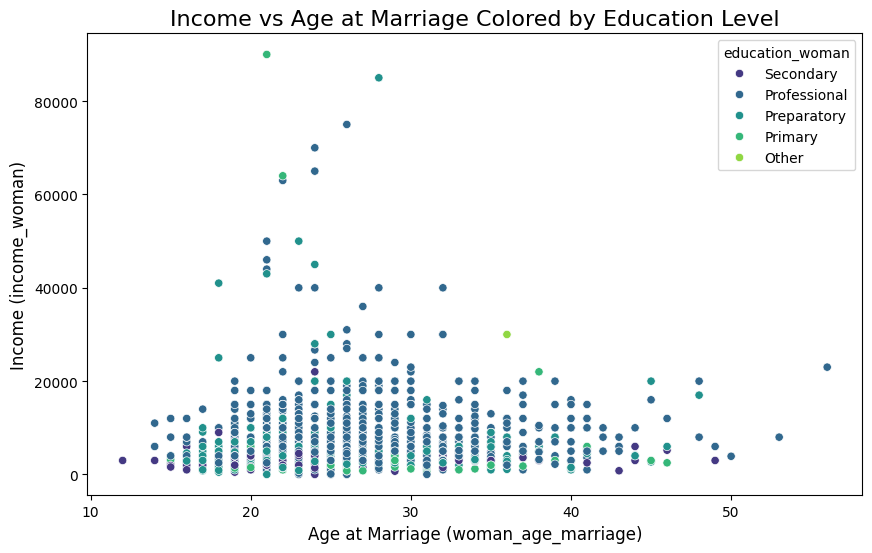

In [15]:
#Adding woman_age_marriage to divorce DataFrame
divorce["woman_age_marriage"] = divorce["marriage_date"].dt.year - divorce["dob_woman"].dt.year


# Create a scatter plot with 'woman_age_marriage' on the x-axis,
# 'income_woman' on the y-axis, and color by 'education_woman'.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman', palette='viridis')

# Add titles and labels
plt.title('Income vs Age at Marriage Colored by Education Level', fontsize=16)
plt.xlabel('Age at Marriage (woman_age_marriage)', fontsize=12)
plt.ylabel('Income (income_woman)', fontsize=12)

# Show the plot

plt.show()

# **Exploring with KDE plots**

Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the `num_kids` column range only from one to five, you can plot the KDE for each value on the same plot.

The `divorce` DataFrame has been loaded previously. `pandas` has been loaded as `pd`, `matplotlib.pyplot` has been loaded as `plt`, and `seaborn` has been loaded as `sns`. Recall that the `num_kids` column in divorce lists only N/A values for couples with no children, so you'll only be looking at distributions for divorced couples with at least one child.

**Instructions:**
1. Create a KDE plot that shows `marriage_duration` on the x-axis and a different colored line for each possible number of children that a couple might have, represented by `num_kids`.
2. Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.
3. Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.


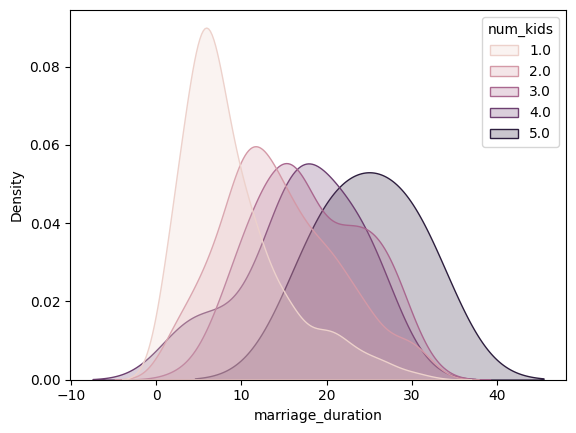

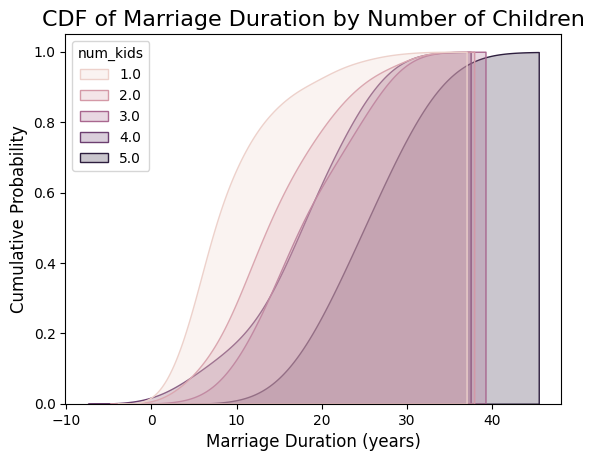

In [16]:


divorce_filtered = divorce.dropna(subset=['num_kids'])


# KDE plot with 'marriage_duration' on the x-axis, coloring by 'num_kids'
sns.kdeplot(data=divorce_filtered, x='marriage_duration', hue='num_kids', fill=True, common_norm=False)

# Show the plot
plt.show()

# Step 3: Update the code for the KDE plot to show CDF for each number of children

# KDE plot with CDF (cumulative distribution function)
sns.kdeplot(data=divorce_filtered, x='marriage_duration', hue='num_kids', fill=True, common_norm=False, cumulative=True)

# Add titles and labels for the CDF plot
plt.title('CDF of Marriage Duration by Number of Children', fontsize=16)
plt.xlabel('Marriage Duration (years)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)

# Show the CDF plot
plt.show()
